<a href="https://colab.research.google.com/github/SalahSoliman/Classification-Algorithms/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Using Logistic regression

we will implement the Logistic regression as a low level programming, without using a real dataset or any library, only Python and Numpy.

We'll do two excercises for this lesson.

1.  Understand and Implement the low level details of the Logistic regression.
2.  Use a real dataset, and a library for the machine learning. 


Note: Make sure you run the cells in sequence



## Understanding Logistic regression





## Logistic Function

This is the logistic function: f(x) = 1/(1+exp(-x))

the logistic function converts numbers to the range of 0 and 1

The following block shows you how the logistic function's plot looks like.




No handles with labels found to put in legend.


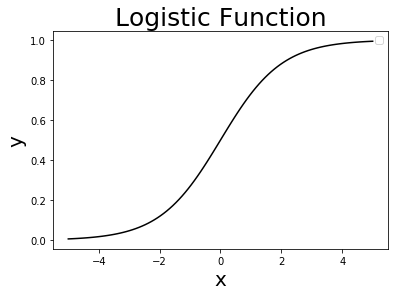

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100) #np.linspace is a function used to create an array starting at 'a' to 'b' in 'n' steps you can use it as follows np.linspace(a, b, n)
y = 1/(1+np.exp(-x))
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)
plt.title("Logistic Function", size=25)
plt.legend(loc='best')
plt.plot(x,y, color="black")

###Notice that when 'x = -5', 'y' becomes a value near, but not equal to zero and when 'x = 5', 'y' becomes a value near, but not equal to 1.


##Let's create our dataset for this example.

No handles with labels found to put in legend.


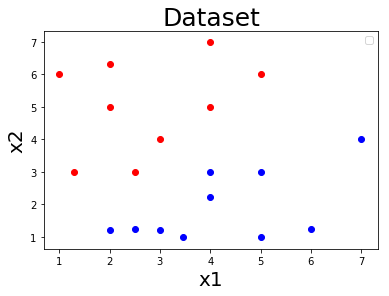

In [0]:


x1 = np.array([1.3, 2, 3, 4, 5, 1, 2, 4, 2.5, 2, 2.5, 3.45, 5, 7, 6, 5, 4, 4, 3])
x2 = np.array([3, 5, 4, 5, 6, 6, 6.3, 7, 3, 1.2, 1.25, 1, 1,4, 1.25, 3, 2.24, 3, 1.2])

y = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
plt.xlabel("x1",size=20)
plt.ylabel("x2",size=20)
plt.title("Dataset", size=25)
plt.legend(loc='best')
plt.scatter(x1[0:9],x2[0:9], color="red")
plt.scatter(x1[9:],x2[9:], color="blue")
#Of course you could create a more complicated dataset.


In this example we've got only two inputs x1, and x2
So our output is: out = b0 + b1*x1 + b2*x2
if we have 3 inputs our output would be "out + b3*x3" and so on.
b0 is the bias, assume you have a linear equation you want to fit between the two classes, b0 is the mx+b, it resembles the shift in the y-axis.
then we need to apply the logistic function to this 'out' so that we have a value ranging from 0 to 1.
so the probability would become as follows: p(class=0) = 1/(1+exp(-out))
if the p > 0.5 we can take the output to be in class 0.

##Stochastic Gradient descent

Now, we are going to update the model's parameters which are (b0, b1, and b2) so that we have a working classifier.

but first we need to set initial values for them, so for the ease, let b0 = 0, b1 = 0, b2 = 0

Let's make our first prediction:
for the first point 
x1 = 1.3, x2 = 3

pred = 1/(1 + exp(-(b0 + b1*x1 + b2*x2)))

pred = 1/(1 + exp(-(0 + 0 + 0)))

pred = 0.5

we then need to update the parameters (b0, b1, b2)

The following block shows how a gradient descent is calculated for logistic regression

In [0]:
def update_parameters(b, y, x, pred, alpha):
  b = b + alpha * (y - pred)* pred *(1- pred)* x                
  return b

##One iteration over the training data

which means we will update the parameters after each point.

In [0]:
def one_epoch(b0, b1, b2, alpha):
  for i in range(y.size):
    pred = 1/(1 + np.exp(-(b0 + b1*x1[i] + b2*x2[i])))
    b0 = update_parameters(b0, y[i], 1, pred, alpha) #the x argument is one because b0 is considered as bias (constant shift in the classifier)
    b1 = update_parameters(b1, y[i], x1[i], pred, alpha)
    b2 = update_parameters(b2, y[i], x2[i], pred, alpha)
  return b0, b1, b2

#Epoch

One epoch is training the model by passing on the training data once.
but now we need to pass by the training data multiple times, so that it's trained well, imagine playing a game for once, this is one epoch, it doesn't mean you're good at this game yet!

In [0]:
def epochs(num, b0, b1, b2, alpha):
  for i in range(num):  #num = number of epochs
    b0, b1, b2 = one_epoch(b0, b1, b2, alpha)
    
  return b0, b1, b2

#Test the model!

Now let's test the model on the training data, it should do well after 6 epochs, but let's test on try with 10 epochs.

if the prediction is less than 0.5 then the point is in class 0, else it's in class 1. 

In [0]:
b0, b1, b2 = epochs(10, 0, 0, 0, 0.2)
for i in range(y.size):
  pred = 1/(1 + np.exp(-(b0 + b1*x1[i] + b2*x2[i])))
  if pred < 0.5:
    pred = 0
  else:
    pred = 1
  print(pred)


0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1


##Plotting

You can now assess the model visually by plotting the line using the following equation:
output = b0 + b1*x1 + b2*x2 

then 

neglecting the output, as it is a number in the end.

so our classifier equation is: x2 = -(b0+b1*x1)/b2

##Live Plotting for the classifier as it's learning.

[1.3  2.   3.   4.   5.   1.   2.   4.   2.5  2.   2.5  3.45 5.   7.
 6.   5.   4.   4.   3.  ]


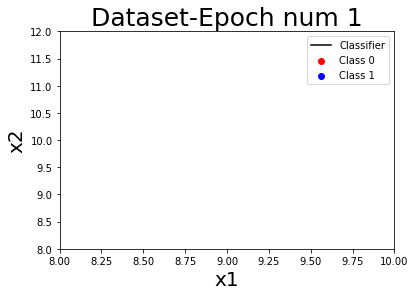

b0 =  0.1086312148005813
b1 =  0.5044999606040819
b2 =  -0.06532588969918891


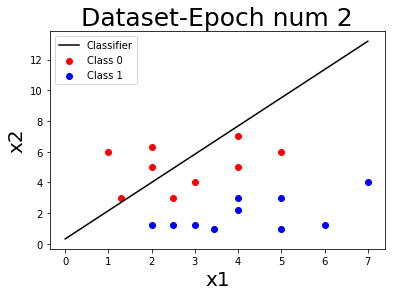

b0 =  0.12069952517964447
b1 =  0.6794557305096829
b2 =  -0.3695988354514573


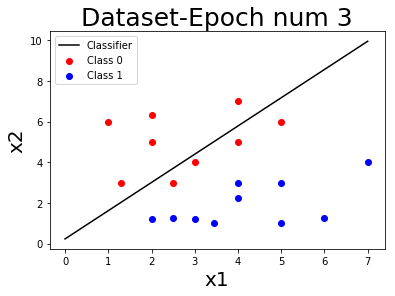

b0 =  0.13455070801548064
b1 =  0.8070259408051157
b2 =  -0.5815811678790787


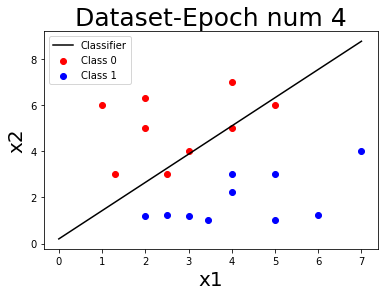

b0 =  0.150458870892504
b1 =  0.9068301417361736
b2 =  -0.7423627555169525


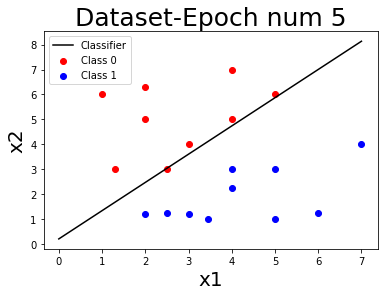

b0 =  0.16718444468802018
b1 =  0.9891744308520096
b2 =  -0.8716217469556241


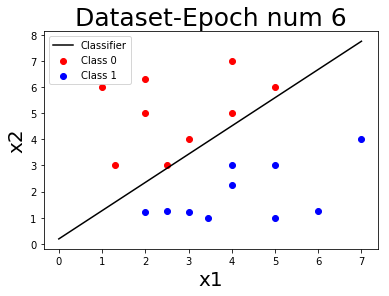

b0 =  0.18384585434840672
b1 =  1.0595071757222956
b2 =  -0.9795177536027725


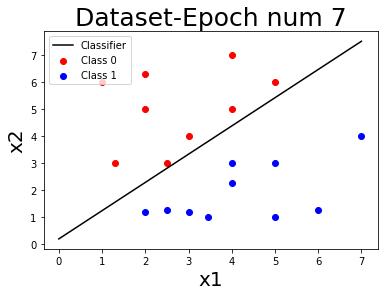

b0 =  0.19995839479958813
b1 =  1.1210361681381633
b2 =  -1.0719576460262559


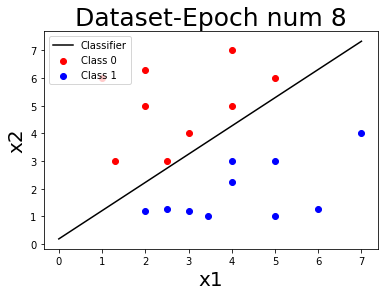

b0 =  0.21528664231528116
b1 =  1.1758067639491394
b2 =  -1.152690478389915


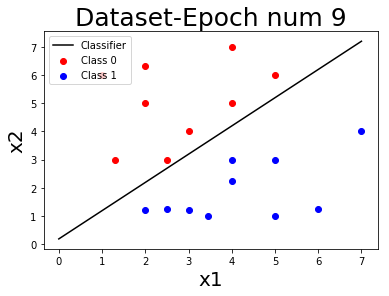

b0 =  0.22973659751825415
b1 =  1.2252077747344334
b2 =  -1.2242571257057613


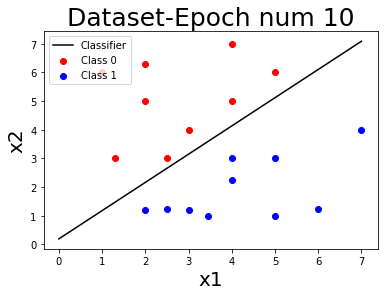

b0 =  0.24329211485501717
b1 =  1.2702302302250716
b2 =  -1.2884648142607111


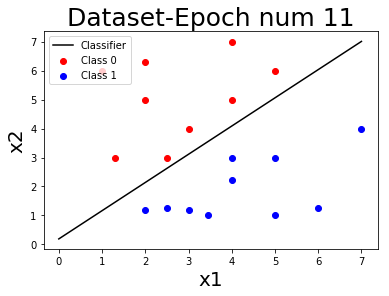

b0 =  0.25597863343935306
b1 =  1.3116093310244852
b2 =  -1.3466460131040285


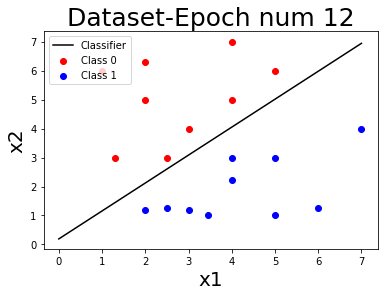

b0 =  0.2678425085211505
b1 =  1.3499073841966411
b2 =  -1.399810737948535


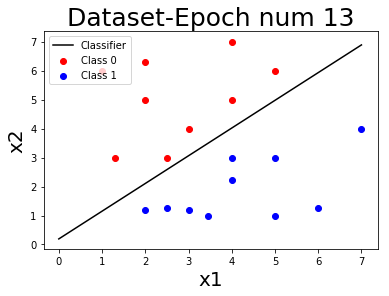

b0 =  0.2789392518970895
b1 =  1.3855650360665397
b2 =  -1.4487417477695639


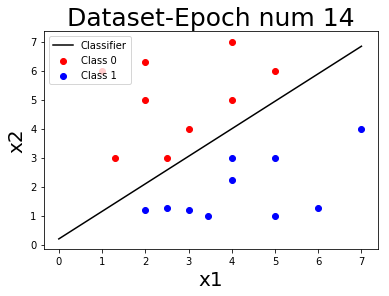

b0 =  0.2893269125179274
b1 =  1.4189344716884147
b2 =  -1.4940569295547297


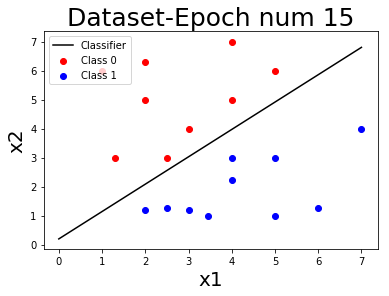

b0 =  0.29906244586253244
b1 =  1.450301812055247
b2 =  -1.5362517206766038


In [0]:
fig =  plt.figure()
axes = plt.gca()
b0=b1=b2=0
for i in range(15):
  i = i+1
  b0, b1, b2 = one_epoch(b0, b1, b2, 0.3)
  x11 = np.linspace(0,7,100)
  x22 = -(b0 + b1*x11)/b2
  plt.xlabel("x1",size=20)
  plt.ylabel("x2",size=20)
  plt.scatter(x1[0:9],x2[0:9], color="red", label="Class 0")
  plt.scatter(x1[9:],x2[9:], color="blue", label="Class 1")
  plt.title("Dataset-Epoch num %i"%i, size=25)
  plt.plot(x11,x22,color='black', label="Classifier")
  plt.legend(loc='best')
  axes.set_xlim([8, 10])
  axes.set_ylim([8,12])
  plt.show()
  print("b0 = ", b0)
  print("b1 = ", b1)
  print("b2 = ", b2)
  #plt.legend(loc='best')

  plt.pause(1)
  

  

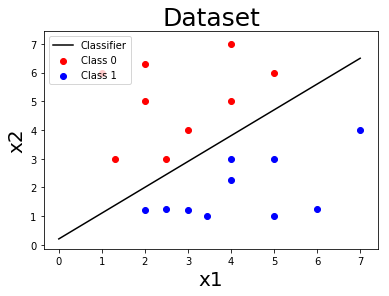

In [0]:
b0, b1, b2 = epochs(40, 0, 0, 0, 0.3)
x11 = np.linspace(0,7,100)
x22 = -(b0 + b1*x11)/b2
plt.xlabel("x1",size=20)
plt.ylabel("x2",size=20)
plt.title("Dataset", size=25)
plt.plot(x11,x22,color='black', label="Classifier")
plt.scatter(x1[0:9],x2[0:9], color="red", label="Class 0")
plt.scatter(x1[9:],x2[9:], color="blue", label="Class 1")
plt.legend(loc='best')


##The above output is 100% accurate!

Of course this isn't the case in real world data, so let's get introduced to more complicated dataset, as well as more professional tools (libraries) for building logistic regression model, and other machine learning models.

##Scikit-Learn Library
Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!

*   Regression, including Linear and Logistic Regression
*   Classification, including K-Nearest Neighbors
*   Various datasets!


####Import the Sklearn library, import the datasets, the logistic regression functionalities, and Confusion matrix from its metrics.

The sklearn.linear_model contains multiple linear models, you can visit this [link](https://scikit-learn.org/stable/modules/linear_model.html) to know more about them.

#####The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance. Some metrics might require probability estimates of the positive class, confidence values, or binary decisions values.

The confusion_matrix will tell you the result of classifications; how did our model do on the given test data.

In [0]:
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

##Loading the Data easier than ever!

We just want to load data from sklearn, ofcourse there are limited datasets, but for learning sakes it would be sufficient.

####Just one line of code!

In [0]:
cancer = datasets.load_breast_cancer()

##What does this data contain?

###The Inputs:
We have 30 Inputs about the tumour detected.
###The Outputs:
Whether it's Benign (not harmful in effect) or Malignant.

In [0]:
print(cancer.feature_names)
print()
print("Number of input variables =", cancer.feature_names.size)
print('--------------------------------------------------------------------')
print("Output Classes: ",cancer.target_names)




['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Number of input variables = 30
--------------------------------------------------------------------
Output Classes:  ['malignant' 'benign']


##Data

You can choose to work on all the input data, or you can exclude or add any data you want, but for now we are going to train the model with all the available inputs.

By printing the input shape we can see that we have 569 examples.

In [0]:
x = cancer.data
y = cancer.target

print(x.shape)
print(y.shape)

(569, 30)
(569,)


##Splitting the data

Sklearn helps you split your data to training and testing data, with just putting the ratio you need, here we put it 0.2 which is 80% of the data for training, and 20% for testing.

To verify we can check the shape of the training data.

In [0]:

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y,test_size=0.2)

print(x_train.shape)


(455, 30)


x_train/x = 455/569 = 0.7996, so yes it's splitting correctly.

##Let's train the model!

All what you got to do is specify the classifier, which is the LogisticRegression classifier.

Then use the `fit` class to train your model.



In [0]:
lr = LogisticRegression()
lr.fit(x_train, y_train )

##Predict the test data

In [0]:
y_pred = lr.predict(x_test)
print(y_pred)

##The Confusion Matrix is important for evaluating the predictions



In [0]:
confusion_matrix(y_test, y_pred)

array([[40,  2],
       [ 1, 71]])

What does it mean?

[[x1, x2],
 [x3, x4]]
 
####x1: true Positive: it got it right in true example
####x2: False Positive: it got it wrong in a true example
####x3: False Negative: it got it wrong in a false example
####x4: True Negative: it got it right in false example

![alt text](https://qph.fs.quoracdn.net/main-qimg-d1f717f321a4ebc8e6d2c1d1cc19f9fc)